In [24]:
import pandas as pd

In [2]:
# 웹에서 테이블 자료 가져오기
url = './dataset/sample.html'
tables = pd.read_html(url)
print(len(tables))
#table을 하나씩 가져옴
for i in range(len(tables)):
    print(tables[i], type(tables[i]))
    
# 두번째에 나오는 테이블을 index로 지정
df = tables[i]
print(df)

2
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9 <class 'pandas.core.frame.DataFrame'>
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True <class 'pandas.core.frame.DataFrame'>
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True


In [3]:
# tabels의 처음 나오는 테이블을 가져와서
# 처음 나오는 컬럼 값 제거
# 인덱스는 'a'부터 순차적으로 저장
df1 = tables[0].copy()

In [4]:
chr(ord('a'))

'a'

In [5]:
df1.drop('Unnamed: 0', axis=1, inplace = True)
print(df1)

   c0  c1  c2  c3
0   0   1   4   7
1   1   2   5   8
2   2   3   6   9


In [9]:
new_index = []
index_chr = 'abcdefghij'
for i in range(len(df1)):
    new_index.append(index_chr[i])
new_index

['a', 'b', 'c']

In [7]:
df1.index = [chr(ord('a')+i) for i in range(len(df1))]
df1

,c0,c1,c2,c3
a,0,1,4,7
b,1,2,5,8
c,2,3,6,9


In [10]:
# 여러 개의 데이터프레임을 하나의 엑셀 파일에 저장
data1 = {'name' : [ 'Jerry', 'Riah', 'Paul'],
         'algol' : [ "A", "A+", "B"],
         'basic' : [ "C", "B", "B+"],
          'c++' : [ "B+", "C", "C+"]}

data2 = {'c0':[1,2,3], 
         'c1':[4,5,6], 
         'c2':[7,8,9], 
         'c3':[10,11,12], 
         'c4':[13,14,15]}

In [13]:
df1 = pd.DataFrame(data1)  # index를 name 컬럼으로
df2 = pd.DataFrame(data2)  # c0를 인덱스 컬럼으로
df1.set_index('name', inplace = True)
df2.set_index('c0', inplace=True)

In [14]:
print(df1) ; print()
print(df2)

      algol basic c++
name                 
Jerry     A     C  B+
Riah     A+     B   C
Paul      B    B+  C+

    c1  c2  c3  c4
c0                
1    4   7  10  13
2    5   8  11  14
3    6   9  12  15


In [19]:
# excel로 저장할 파일 명 : df_excel.xlsx
writer = pd.ExcelWriter('./dataset/df_excel.xlsx')
df1.to_excel(writer, sheet_name = 'sheet1')
df2.to_excel(writer, sheet_name = 'sheet2')

In [21]:
writer.save()

In [28]:
# 남북한발전전력량을 파일에서 읽어 데이터프레임으로 저장
# 남한 행과 북한 행의 자료중 실제 데이터가 저장된 연도부터 자료를 가져옴 -> df_ns
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df.head(6)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239


In [39]:
# 2. 0행과 5행의 자료 중 1990 컬럼 이후의 자료만 가져옴
df_ns = df.iloc[[0, 5], 2:]
df_ns
df_ns.columns = df_ns.columns.map(int)  # map : 데이터 타입 변경
df_ns.columns

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016],
           dtype='int64')

In [40]:
# 행의 인덱스는 -> 'South', 'North'로 설정
df_ns.index = ['South', 'North']
df_ns

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


<AxesSubplot:>

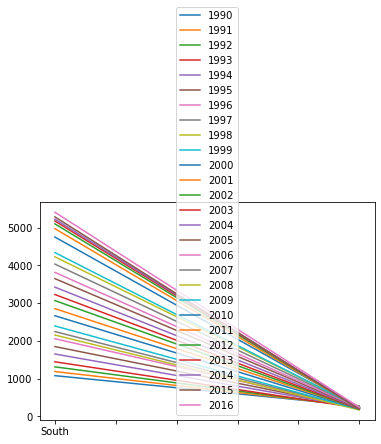

In [41]:
df_ns.plot()  # 인덱스와 컬럼을 위치 변경 필요

<AxesSubplot:>

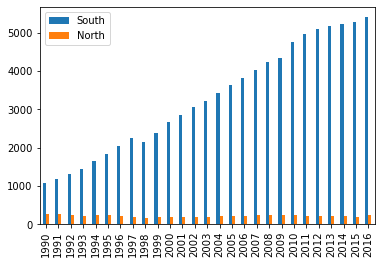

In [49]:
tdf_ns = df_ns.transpose()  # 인덱스와 컬럼을 위치 변경 (전치 행렬 생성)
tdf_ns.plot(kind='bar')  # 막대 그래프 (수평)

<AxesSubplot:>

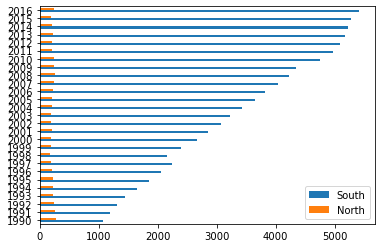

In [52]:
tdf_ns.plot(kind='barh')  # 막대 그래프 (수직)

<AxesSubplot:>

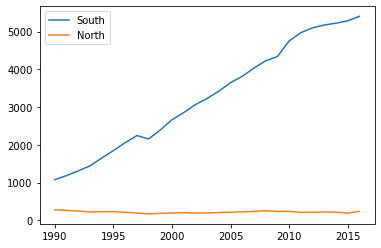

In [51]:
tdf_ns.plot()  # 선 그래프

In [55]:
# 산점도 : kind = 'scatter'
df1 = pd.read_csv('./dataset/auto-mpg.csv', header = None)
df1.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [56]:
df1.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000
